## 2.2 Microprocessor Problem

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

### Read the data

In [2]:
names = ["test-1", "test-2", "result"]
data = pd.read_csv("ex2data2.txt", header = None, names = names)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
data.head(5)

test-1   test-2  result
0  0.051267  0.69956       1
1 -0.092742  0.68494       1
2 -0.213710  0.69225       1
3 -0.375000  0.50219       1
4 -0.513250  0.46564       1

### Visualize the data

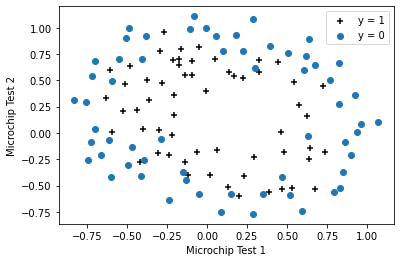

In [3]:
mask = y == 1
good = plt.scatter(X[mask]["test-1"].values, X[mask]["test-2"].values, color = "black", marker = "+")
bad = plt.scatter(X[~mask]["test-1"].values, X[~mask]["test-2"].values)
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend((good, bad), ("y = 1", "y = 0"))
plt.show()

### Add higher dimentional features

In [4]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones((X.shape[0], 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.hstack((out, np.multiply(np.power(X1, i - j), np.power(X2, j))[:, np.newaxis]))
    return out

### Sigmoid function

In [5]:
def sigmoid(X): 
    return 1 / (1 + np.exp(-X)) 

### Cost function

In [6]:
def costFunctionReg(theta, X, y, lmbda):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    reg = (lmbda/(2*m)) * (theta[1:].T @ theta[1:])
    return (J + reg)

### Gradient Function

In [7]:
def gradientDescentReg(theta, X, y, lmbda):
    m = len(y)
    grad = (1/m) * (X.T) @ (sigmoid(X @ theta) - y)
    grad[1:] += (lmbda / m) * theta[1:]
    return grad

In [8]:
X = mapFeature(X.iloc[:, 0], X.iloc[:, 1])
y = y[:, np.newaxis]
(m, n) = X.shape

#### Cost and gradient at initial theta

In [9]:
init_theta = np.zeros((n, 1))
lmbda = 1
J = costFunctionReg(init_theta, X, y, lmbda)
grad = gradientDescentReg(init_theta, X, y, lmbda)

print("Cost at initial theta (zeros): %f" % J);
print("Expected cost (approx): 0.693");
print("Gradient at initial theta (zeros) - first five values only:");
print(" %f\n %f\n %f\n %f\n %f" % (grad[0], grad[1], grad[2], grad[3], grad[4]));
print("Expected gradients (approx) - first five values only:");
print(" 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n\n");

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 0.008475
 0.018788
 0.000078
 0.050345
 0.011501
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115




#### Cost and gradient at test theta

In [10]:
test_theta = np.ones((n, 1))
lmbda = 10
J = costFunctionReg(test_theta, X, y, lmbda)
grad = gradientDescentReg(test_theta, X, y, lmbda)


print("Cost at test theta (with lambda = 10): %f" % J);
print("Expected cost (approx): 3.16");
print("Gradient at test theta - first five values only:");
print(" %f\n %f\n %f\n %f\n %f" % (grad[0], grad[1], grad[2], grad[3], grad[4]));
print("Expected gradients (approx) - first five values only:");
print(" 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n\n");

Cost at test theta (with lambda = 10): 3.164509
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
 0.346045
 0.161352
 0.194796
 0.226863
 0.092186
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922




### Minimize the cost

In [11]:
lmbda = 1
theta, nfeval, rc = opt.fmin_tnc(func = costFunctionReg, x0 = init_theta.flatten(), \
        fprime = gradientDescentReg, args = (X, y.flatten(), lmbda))

### Accuracy of the model

In [12]:
p = [sigmoid(np.dot(X, theta)) > 0.5];

print("Train Accuracy: %f" % (np.mean(p == y.flatten()) * 100));
print("Expected accuracy (with lambda = 1): 83.05 (approx)\n\n");

Train Accuracy: 83.050847
Expected accuracy (with lambda = 1): 83.05 (approx)




### Plot decision boundary

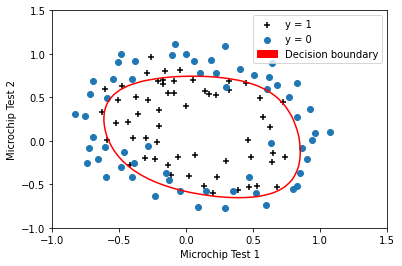

In [13]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)

mask = y == 1
good = plt.scatter(data.iloc[:, :-1][mask]["test-1"].values, data.iloc[:, :-1][mask]["test-2"].values, color = "black", marker = "+")
bad = plt.scatter(data.iloc[:, :-1][~mask]["test-1"].values, data.iloc[:, :-1][~mask]["test-2"].values)
cs = plt.contour(u, v, z, 0, colors = ["red"])
proxy = plt.Rectangle((0, 0), 1, 1, color = "red")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend((good, bad, proxy), ("y = 1", "y = 0", "Decision boundary"))
plt.show()